# Correction TP2 Chaînes de caractères, dictionnaires et ensembles

In [27]:
from sympy import *

In [28]:
init_printing()
%matplotlib inline

## 1. Opérations de base sur les ensembles

1. Donnez dans $E1$ les éléments qui composent l'ensemble des parties de $\{1,2,3\}$

In [29]:
E=FiniteSet(1,2,3) #création d'un ensemble E

In [30]:
E1=E.powerset()
E1

2. Calculez la liste de la somme des éléments de chaque sous-ensemble de $E1$

In [31]:
set(sum(x) for x in E1)

In [32]:
[sum(i) for i in E1] #pour avoir le résultat sous forme de liste

In [33]:
sum_list=[]
for s in E1:
    sum_list.append(sum(s))
sum_list #obtention du résultat par une boucle

$Remarque:$ l'ensemble qui en résulte n'est plus un ensemble de sympy mais un ensemble de python, il est possible de le convertir en un ensemble sympy de la manière suivante: `FiniteSet(*set(sum(x) for x in PE1))`

3. Construisez $A$, le sous ensemble de $E1$ qui contient les éléments dont la somme des éléments est inférieure ou égale à 3.

In [35]:
A=set(x for x in E1 if sum(x)<= 3)
A

4. Construisez $B$, l'ensemble des éléments de $E1$ de cardinalité paire

In [36]:
B=set(x for x in E1 if len(x)%2==0)
B

5. Donnez les élements de l'union, de l'intersection, de la différence et de la différence symétrique de $A$ et $B$. Le cas échéant, faites attention au type des résultats.

Pour l'union puis l'intersection:

In [37]:
A.union(B)

In [38]:
A.intersection(B)

La différence A/B puis B/A:

In [39]:
A-B

In [40]:
B-A

 La différence symétrique (en mathématique: A/B U B/U):

In [41]:
(A-B).union(B-A)

$remarque:$  l'union, l'intersection, la différence et la différence symétrique de  A  et  B fonctionnent de la même manière que les ensembles sous sympy

6. Calculez le produit cartésien de $A\times B$

Méthode 1: avec intertools.

In [42]:
import itertools
set(itertools.product(A,B))

Méthode 2: cette méthode ne fonctionne que sur les ensembles de sympy, nous devons donc convertire nos ensembles avant de réaliser le produit cartésien.

In [43]:
A=FiniteSet(*A)
B=FiniteSet(*B)

In [44]:
set(A*B)

## 2. Calcul de la bijection de $N^2\rightarrow N$

1. La fonction $f(x,y)=y+(x+y)(x+y+1)/2$ permet de construire une bijection de $N^2\rightarrow N$. Affichez-en les 121 premières valeurs (11 valeurs par ligne). On considérera la création d'une matrice par la fonction `f` (à 2 variables). Regardez la documentation sur la création de matrices.

In [58]:
x,y = symbols('x y')                     #déclaration des variables symboliques
f = Lambda([x,y], (y+(x+y)*(x+y+1)/2))   #création de la fonction f

In [56]:
def f_prime(x,y): return y+(x+y)*(x+y+1)/2     #autre façon de créer la fonction f, sans sympy

In [47]:
f(1,3)

En programmation, les matrices sont une liste qui contient plusieurs listes (de taille égale) qui vont former les colonnes. Nous allons donc commencer par créer une matrice qui contient tous les couples avec le résultat de l'application de f sur tous les couples (x,y).
Pour cela, voici deux méthodes dont une explicite (matrice1) et l'autre compacte (matrice2).

In [48]:
matrice1=list()
for i in range(11):             #i et j in range(11) car nous voulons 11 colonnes et 11 lignes
    colonne=list()
    for j in range(11):
        colonne.append(f(i,j))  #chaque colonne sera commposé du même x mais d'un y différent
    matrice1.append(colonne)
matrice1=Matrix(matrice1)       #création de la martice a l'aide de sympy

In [49]:
matrice2=Matrix([[f(i,j) for i in range(11)  ] for j in range(11)])

In [50]:
Matrix(11,11,f)   #autre solution plus courte

⎡0   2   5   9   14   20   27   35   44   54   65 ⎤
⎢                                                 ⎥
⎢1   4   8   13  19   26   34   43   53   64   76 ⎥
⎢                                                 ⎥
⎢3   7   12  18  25   33   42   52   63   75   88 ⎥
⎢                                                 ⎥
⎢6   11  17  24  32   41   51   62   74   87   101⎥
⎢                                                 ⎥
⎢10  16  23  31  40   50   61   73   86   100  115⎥
⎢                                                 ⎥
⎢15  22  30  39  49   60   72   85   99   114  130⎥
⎢                                                 ⎥
⎢21  29  38  48  59   71   84   98   113  129  146⎥
⎢                                                 ⎥
⎢28  37  47  58  70   83   97   112  128  145  163⎥
⎢                                                 ⎥
⎢36  46  57  69  82   96   111  127  144  162  181⎥
⎢                                                 ⎥
⎢45  56  68  81  95   110  126  143  161  180  200⎥
⎢           

2. Affichez (par `plot3d`) les valeurs de la fonction `f` pour $0≤x≤10$ et $0≤y≤10$. Attention ! La fonction `plot3d` doit être explicitement importée de `sympy.plotting`

$Attention:$ cette étape ne peut fonctionner que si la fonction `%matplotlib inline` a était executée avant

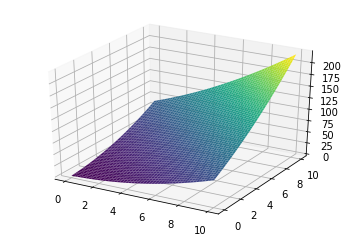

In [51]:
from sympy.plotting import plot3d
plot3d(f(x,y), (x,0,10),(y,0,10))

3. Montrez grâce à `SymPy` que la fonction $f(x,y)$ ci-dessus est identique au polynôme de Cantor $g(x,y)=(3x+y+(x+y)^2)/2$. Considérez un changement de variable sur $g$ et développez les deux polynômes.

In [52]:
g=Lambda([x,y],(3*x+y+(x+y)**2)/2)

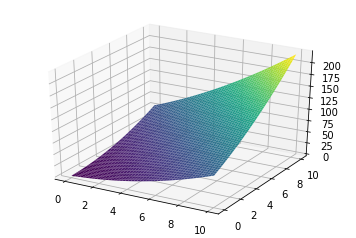

In [53]:
plot3d(g(x,y), (x,0,10),(y,0,10))

In [54]:
expand(g)

In [59]:
expand(f)

Nous remarquons que la fonction f est semblable à la fonction g d'après le graphique. De plus, on peut voir que f est égale à la fonction g si on inverse x->y et y->x tel que f(x,y)=g(y,x). En voici la preuve:

In [60]:
expand(g(y,x))==expand(f(x,y))

True

## 3. Exercice sur les chaînes et les dictionnaires

1. Ecrivez une fonction qui prend en entrée une chaîne de caractères, qui efface les espaces (s'il y en a) et qui retourne la chaîne de caractères privée de ses espaces. On considérera la méthode `replace()`.

In [61]:
def efface(chaine):
    return chaine.replace(' ','')

In [62]:
def efface_prime(s):
    return s.lower().replace(' ','')     #met aussi les caractères en minuscule pour simplifier la recherche

2. Ecrivez une fonction `occurrences()` qui prend en entrée une chaîne de caractères et retourne  le nombre d'occurrences des lettres de l'alphabet {a,...,z} dans un dictionnaire.

In [63]:
alphabet=[chr(i+ord("a")) for i in range(26)]

In [65]:
def occurrences (chaine):
        return {x: (chaine.count(x)) for x in alphabet}

In [66]:
val=occurrences(efface("c est un exemple"))
val

{'a': 0,
 'b': 0,
 'c': 1,
 'd': 0,
 'e': 4,
 'f': 0,
 'g': 0,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 1,
 'm': 1,
 'n': 1,
 'o': 0,
 'p': 1,
 'q': 0,
 'r': 0,
 's': 1,
 't': 1,
 'u': 1,
 'v': 0,
 'w': 0,
 'x': 1,
 'y': 0,
 'z': 0}

3. Transformez le dictionnaire obtenu précédemment pour que les valeurs soient exprimées selon un pourcentage

Pour cette question nous allons aborder 2 moyens différents:
tout d'abord le faire en modifiant la fonction "occurrences" 
puis en modifiant uniquement le dictionnaire.

$Methode 1:$

In [67]:
def occurrences1 (chaine):
    somme=len(efface(chaine))
    return {x: (round(((chaine.count(x))/somme),3)*100) for x in alphabet}
occurrences1("c est un exemple")

{'a': 0.0,
 'b': 0.0,
 'c': 7.7,
 'd': 0.0,
 'e': 30.8,
 'f': 0.0,
 'g': 0.0,
 'h': 0.0,
 'i': 0.0,
 'j': 0.0,
 'k': 0.0,
 'l': 7.7,
 'm': 7.7,
 'n': 7.7,
 'o': 0.0,
 'p': 7.7,
 'q': 0.0,
 'r': 0.0,
 's': 7.7,
 't': 7.7,
 'u': 7.7,
 'v': 0.0,
 'w': 0.0,
 'x': 7.7,
 'y': 0.0,
 'z': 0.0}

$Methode 2:$

In [68]:
def dictionaire_pourcentage(dic):
    somme=sum(dic.values()) #somme du nombre de l'occurence de chaque lettre
    for key in dic.keys():
        dic[key]=round((dic[key]/somme)*100,1) #pour chaque élément on le transforme en pourcentage
    return dic
dictionaire_pourcentage(val)

{'a': 0.0,
 'b': 0.0,
 'c': 7.7,
 'd': 0.0,
 'e': 30.8,
 'f': 0.0,
 'g': 0.0,
 'h': 0.0,
 'i': 0.0,
 'j': 0.0,
 'k': 0.0,
 'l': 7.7,
 'm': 7.7,
 'n': 7.7,
 'o': 0.0,
 'p': 7.7,
 'q': 0.0,
 'r': 0.0,
 's': 7.7,
 't': 7.7,
 'u': 7.7,
 'v': 0.0,
 'w': 0.0,
 'x': 7.7,
 'y': 0.0,
 'z': 0.0}

4. Affichez l'histogramme des fréquences des lettres

In [69]:
import matplotlib.pyplot as plt

<BarContainer object of 26 artists>

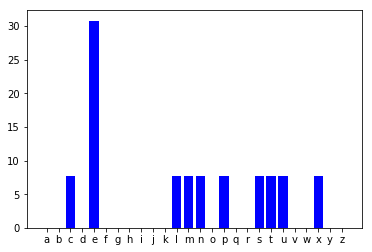

In [70]:
plt.bar(list(val.keys()),list(val.values()),color='b')

5. Écrire une fonction qui chiffre (et déchiffre) en utilisant le chiffre de César (décalage des lettres de $k$ positions vers la droite modulo 26). On supposera que le texte est écrit sur l'alphabet {a,..,z} sans caractères accentués (ou on le nettoiera en utilisant la fonction du cours) et dans lequel les espaces ont été retirés.

In [71]:
def cesar (texte,k):
    C=efface(texte) #utilisation de la fonction qui efface les espaces sur le texte
    crypt=""
    for i in C:
        crypt+=chr((ord(i)-97+k)%26+97)   #ajout de k modulo 26 à chacune des lettres
    return crypt

In [72]:
crypt=cesar("un bel exemple",3)
crypt

'xqehohahpsoh'

In [73]:
clair=cesar(crypt,-3)
clair

'unbelexemple'

6. Affichez l'histogramme des fréquences des lettres du texte clair puis du texte chiffré par le chiffre de César.

In [74]:
def histogramme(texte):
    occ_texte=occurrences1(texte) #on utilise la fonction "occurences" qui transforme directement les valeurs en pourcentage
    return plt.bar(list(occ_texte.keys()),list(occ_texte.values()),color='b')

<BarContainer object of 26 artists>

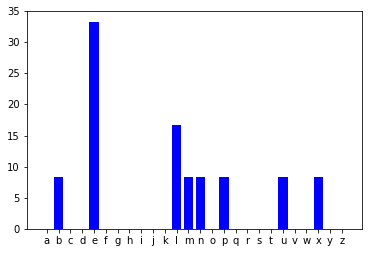

In [75]:
histogramme(clair)

<BarContainer object of 26 artists>

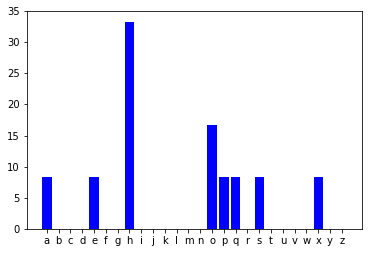

In [76]:
histogramme(crypt)

7. Que pouvez-vous en déduire ?

La fréquence des lettres reste la même (6 lettres à 8%, 1 lettre à 16%, 1 lettre à 33%) dans les deux cas, mais décaler de 3 rangs vers la droite par rapport au message clair, on en déduit qu'ils restent dans le même ordre.

8. Faites la cryptanalyse du texte chiffré 'npdeqlntwpopeczfgpcolydnpepipxawp'

Pour decrypter le message nous allons essayer les 26 déplacements possibles et voir lequel de ces clés permet de trouver un message lisible.

In [77]:
def decrypt(texte):
    for i in range (26):
        print( i,':' ,cesar(texte,-i))

In [78]:
decrypt('npdeqlntwpopeczfgpcolydnpepipxawp')

0 : npdeqlntwpopeczfgpcolydnpepipxawp
1 : mocdpkmsvonodbyefobnkxcmodohowzvo
2 : lnbcojlrunmncaxdenamjwblncngnvyun
3 : kmabnikqtmlmbzwcdmzlivakmbmfmuxtm
4 : jlzamhjpslklayvbclykhuzjlaleltwsl
5 : ikyzlgiorkjkzxuabkxjgtyikzkdksvrk
6 : hjxykfhnqjijywtzajwifsxhjyjcjruqj
7 : giwxjegmpihixvsyzivherwgixibiqtpi
8 : fhvwidflohghwurxyhugdqvfhwhahpsoh
9 : eguvhcekngfgvtqwxgtfcpuegvgzgorng
10 : dftugbdjmfefuspvwfsebotdfufyfnqmf
11 : cestfaciledetrouverdanscetexemple
12 : bdrsezbhkdcdsqntudqczmrbdsdwdlokd
13 : acqrdyagjcbcrpmstcpbylqacrcvcknjc
14 : zbpqcxzfibabqolrsboaxkpzbqbubjmib
15 : yaopbwyehazapnkqranzwjoyapatailha
16 : xznoavxdgzyzomjpqzmyvinxzozszhkgz
17 : wymnzuwcfyxynliopylxuhmwynyrygjfy
18 : vxlmytvbexwxmkhnoxkwtglvxmxqxfiex
19 : uwklxsuadwvwljgmnwjvsfkuwlwpwehdw
20 : tvjkwrtzcvuvkiflmviurejtvkvovdgcv
21 : suijvqsybutujhekluhtqdisujunucfbu
22 : rthiuprxatstigdjktgspchrtitmtbeat
23 : qsghtoqwzsrshfcijsfrobgqshslsadzs
24 : prfgsnpvyrqrgebhireqnafprgrkrzcyr
25 : oqefrmouxqpqfdaghqdpmzeoqfqjqy

Nous pouvons voir clairement que le message crypté a utilisé la clé 11: `11 : cestfaciledetrouverdanscetexemple`

9. Mesurez le temps CPU pris par le programme de cryptanalyse (considérez la commande magique `%%time`)

In [79]:
%%time
decrypt('npdeqlntwpopeczfgpcolydnpepipxawp')

0 : npdeqlntwpopeczfgpcolydnpepipxawp
1 : mocdpkmsvonodbyefobnkxcmodohowzvo
2 : lnbcojlrunmncaxdenamjwblncngnvyun
3 : kmabnikqtmlmbzwcdmzlivakmbmfmuxtm
4 : jlzamhjpslklayvbclykhuzjlaleltwsl
5 : ikyzlgiorkjkzxuabkxjgtyikzkdksvrk
6 : hjxykfhnqjijywtzajwifsxhjyjcjruqj
7 : giwxjegmpihixvsyzivherwgixibiqtpi
8 : fhvwidflohghwurxyhugdqvfhwhahpsoh
9 : eguvhcekngfgvtqwxgtfcpuegvgzgorng
10 : dftugbdjmfefuspvwfsebotdfufyfnqmf
11 : cestfaciledetrouverdanscetexemple
12 : bdrsezbhkdcdsqntudqczmrbdsdwdlokd
13 : acqrdyagjcbcrpmstcpbylqacrcvcknjc
14 : zbpqcxzfibabqolrsboaxkpzbqbubjmib
15 : yaopbwyehazapnkqranzwjoyapatailha
16 : xznoavxdgzyzomjpqzmyvinxzozszhkgz
17 : wymnzuwcfyxynliopylxuhmwynyrygjfy
18 : vxlmytvbexwxmkhnoxkwtglvxmxqxfiex
19 : uwklxsuadwvwljgmnwjvsfkuwlwpwehdw
20 : tvjkwrtzcvuvkiflmviurejtvkvovdgcv
21 : suijvqsybutujhekluhtqdisujunucfbu
22 : rthiuprxatstigdjktgspchrtitmtbeat
23 : qsghtoqwzsrshfcijsfrobgqshslsadzs
24 : prfgsnpvyrqrgebhireqnafprgrkrzcyr
25 : oqefrmouxqpqfdaghqdpmzeoqfqjqy

10. Pour les plus avancés, transformez le chiffrement qui se fait par une addition %26 par une multiplication %26. Attention toutefois, la valeur de la clef doit être inversible dans les entiers modulo 26 (considérez l'algorithme d'Euclide étendu qui donne les coefficients de Bézout).

Pour créer la fonction avec une multiplication il suffit de remplacer le "+k par *k" mais pour que la clé soit valide il faut que sa valeur soit inversible par modulo 26. Pour cela, il nous suffit de vérifier si le gcd(k,26)=1 dans ce cas il est donc possible de le crypter puis le decrypter.

In [80]:
def cesar2 (texte,k):
    if gcd(26,k)==1:
        C=efface(texte)
        crypt=""
        for i in C:
            crypt+=chr(((ord(i)-97)*k)%26+97)
        return crypt
    else :
        print('clef invalide')

Pour le decryptage nous allons créer la table des inversibles modulo 26. En premier temps nous allons faire une liste des inversibles %26.

In [81]:
inversible=list()
for i in range(1,26):
    if gcd(26,i)==1:
        inversible.append(i)
inversible

In [82]:
inversible=[i for i in range(1,26) if gcd(i,26)==1]
inversible      #autre façon de créer la liste en compréhension

Nous testons pour chacun de ces nombres inversibles %26 quelle est la valeur de son inverse de la sorte que (n*inverse)%26=1 et cela nous permet de créer la table des inverses.

In [83]:
table_des_inversibles=dict()
for i in inversible:
    for j in range(26): 
        if (i*j)%26==1:
            table_des_inversibles[i]=j

Il nous reste plus qu'à decrypter le message en utilisant tous les inverses et en affichant la clé qui a permis de le coder.

In [84]:
def decrypte2(texte):
    for i in  table_des_inversibles.keys():
        print(i,":",cesar2(texte,table_des_inversibles[i]))

Voici un exemple du cryptage et du decryptage:

In [85]:
cesar2("ceci est un message crypter",3)

'gmgymcfinkmccasmgzutfmz'

In [86]:
decrypte2('gmgymcfinkmccasmgzutfmz')

1 : gmgymcfinkmccasmgzutfmz
3 : ceciestunmessagecrypter
5 : wswksqbmncsqqaoswfejbsf
7 : mymwyexqnuyeeakymlozxyl
9 : sksukgpynekggacksxifpkx
11 : kukoumrwniummaeukhqxruh
15 : qgqmgojensgooawgqtkdjgt
17 : iqigqulcnwquuayqidsvlqd
19 : ocoecwdkngcwwaqcopmbdcp
21 : eieqikzonyikkamievwrziv
23 : ywyswihgnowiiauwyjclhwj
25 : uoucoyvsnqoyyaioubghvob


Nous pouvons retrouver la clé et le message: `3 : ceciestunmessagecrypter`